In [1]:
import re
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

### Read the raw analyst rating file ###

In [2]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Display the first few rows of the data
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

### Descriptive statistics 

Descriptive Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


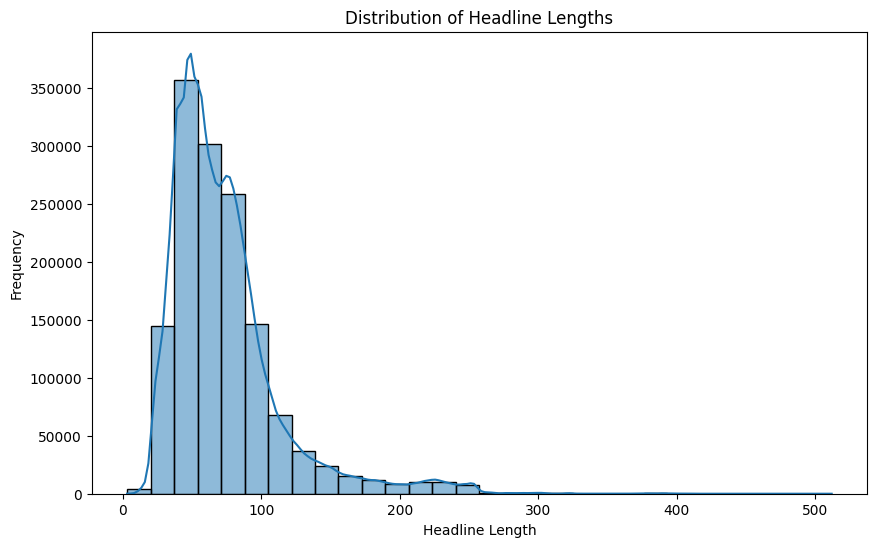


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


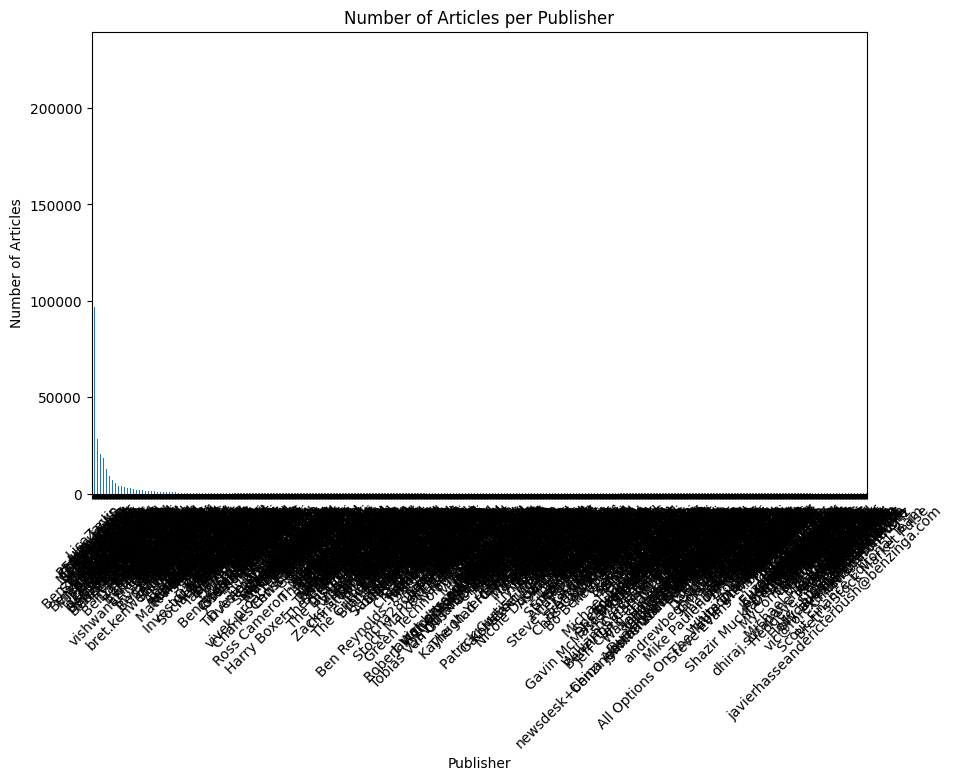


Number of Articles Published Over Time:
publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 3946, dtype: int64


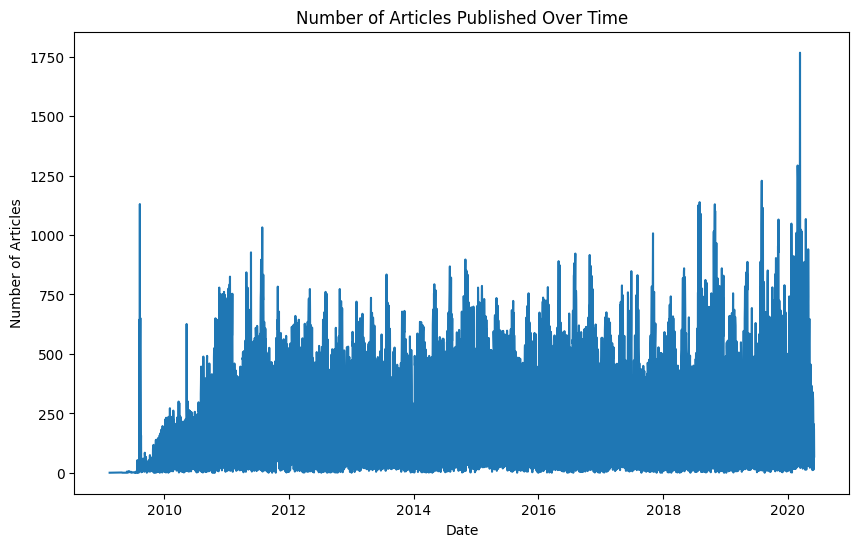


Number of Articles by Day of the Week:
day_of_week
Monday       254842
Tuesday      285468
Wednesday    289049
Thursday     289907
Friday       208511
Saturday       7486
Sunday        16078
Name: count, dtype: int64


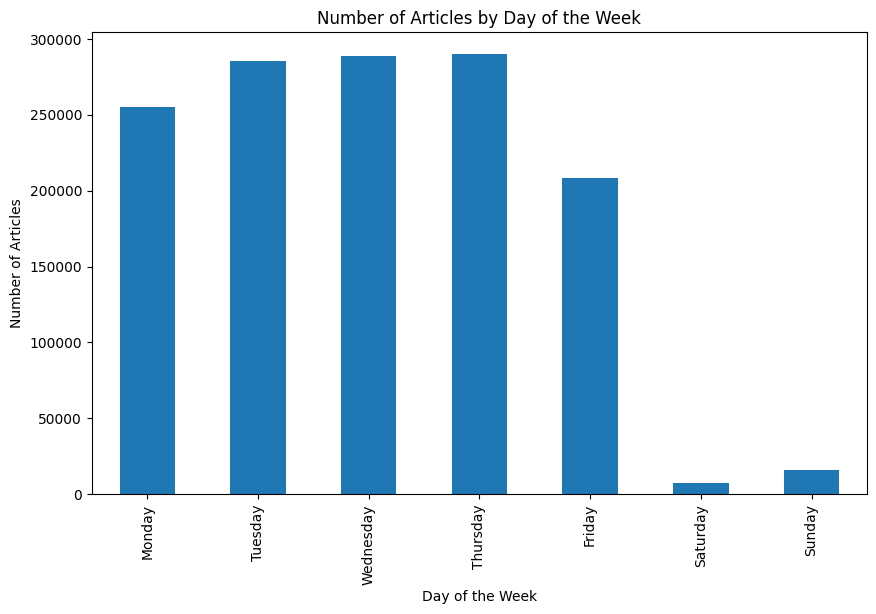

In [3]:
# Convert the date column to datetime format
# Using format='%Y-%m-%d %H:%M:%S' to match the data format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Descriptive Statistics for textual lengths (like headline length)
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Descriptive Statistics for Headline Lengths:")
print(headline_stats)

# Visualize the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)

# Visualize the number of articles per publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Analyze publication dates to see trends over time
# Extracting the date part (ignoring the time)
df['publication_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()

# Group by date to get the number of articles per day
articles_per_day = df.groupby('publication_date').size()

print("\nNumber of Articles Published Over Time:")
print(articles_per_day)

# Visualize the number of articles over time
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Analyze the number of articles by day of the week
articles_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nNumber of Articles by Day of the Week:")
print(articles_by_day)

# Visualize the number of articles by day of the week
plt.figure(figsize=(10, 6))
articles_by_day.plot(kind='bar')
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()


## Time series analysis

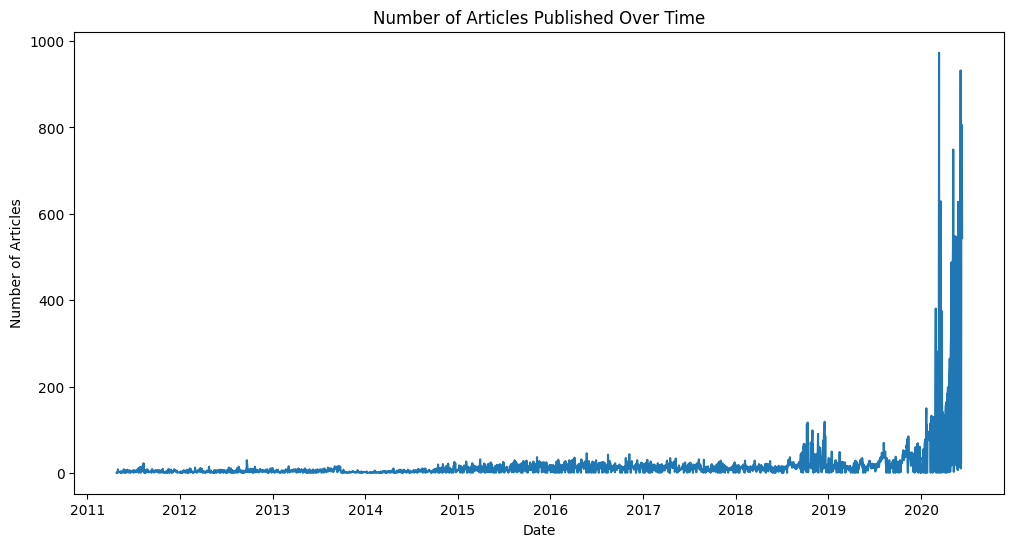

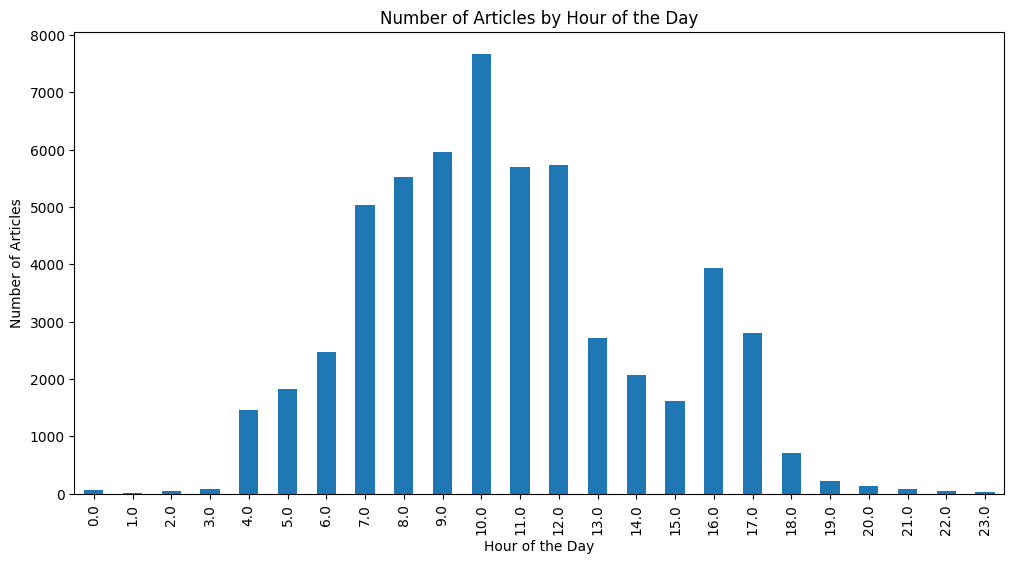

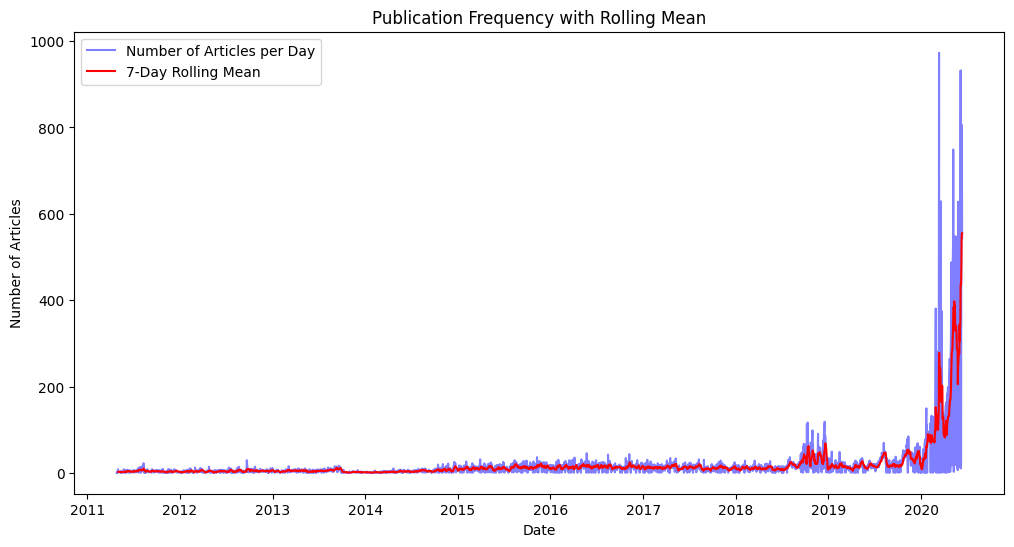

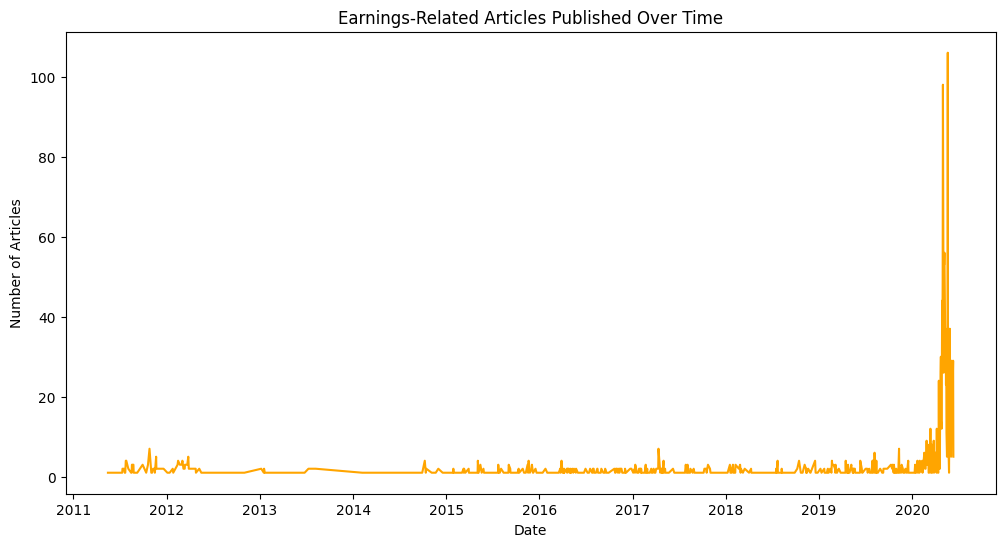

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extracting the date part and time part for analysis
df['publication_date'] = df['date'].dt.date
df['publication_time'] = df['date'].dt.time

# Group by date to get the number of articles per day
articles_per_day = df.groupby('publication_date').size()

# Visualize the number of articles over time
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Time of publication analysis
df['hour'] = df['date'].dt.hour
articles_by_hour = df.groupby('hour').size()

# Visualize the number of articles by hour
plt.figure(figsize=(12, 6))
articles_by_hour.plot(kind='bar')
plt.title('Number of Articles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

rolling_mean = articles_per_day.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('Publication Frequency with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

# Identifying spikes related to market events using regular expressions
# Example: Identify articles related to "earnings" announcements
df['earnings_related'] = df['headline'].apply(lambda x: 1 if re.search(r'\bearnings\b', x, re.IGNORECASE) else 0)
earnings_articles_per_day = df[df['earnings_related'] == 1].groupby('publication_date').size()

# Visualize spikes related to earnings
plt.figure(figsize=(12, 6))
plt.plot(earnings_articles_per_day, label='Earnings-Related Articles per Day', color='orange')
plt.title('Earnings-Related Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


## Publisher analysis


Top Domains:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


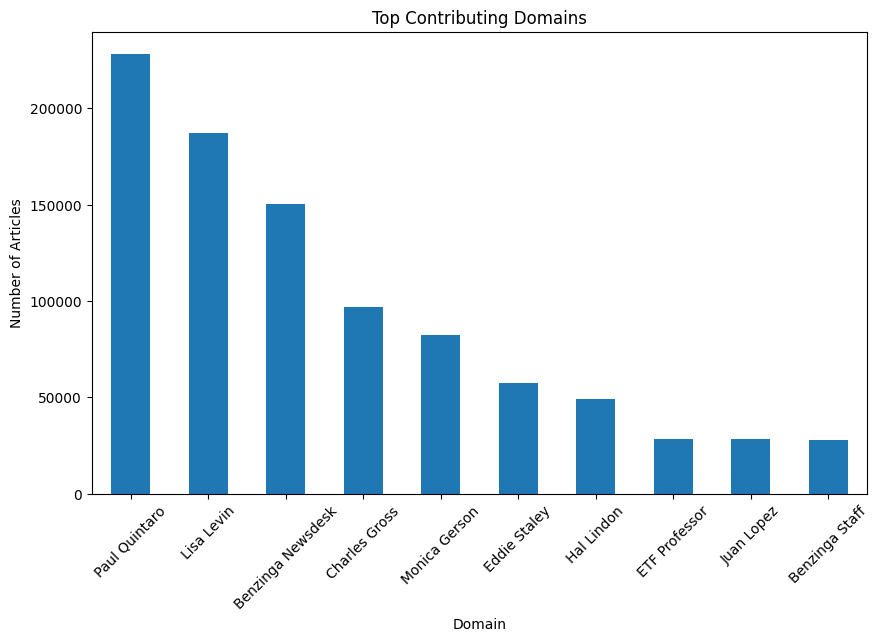

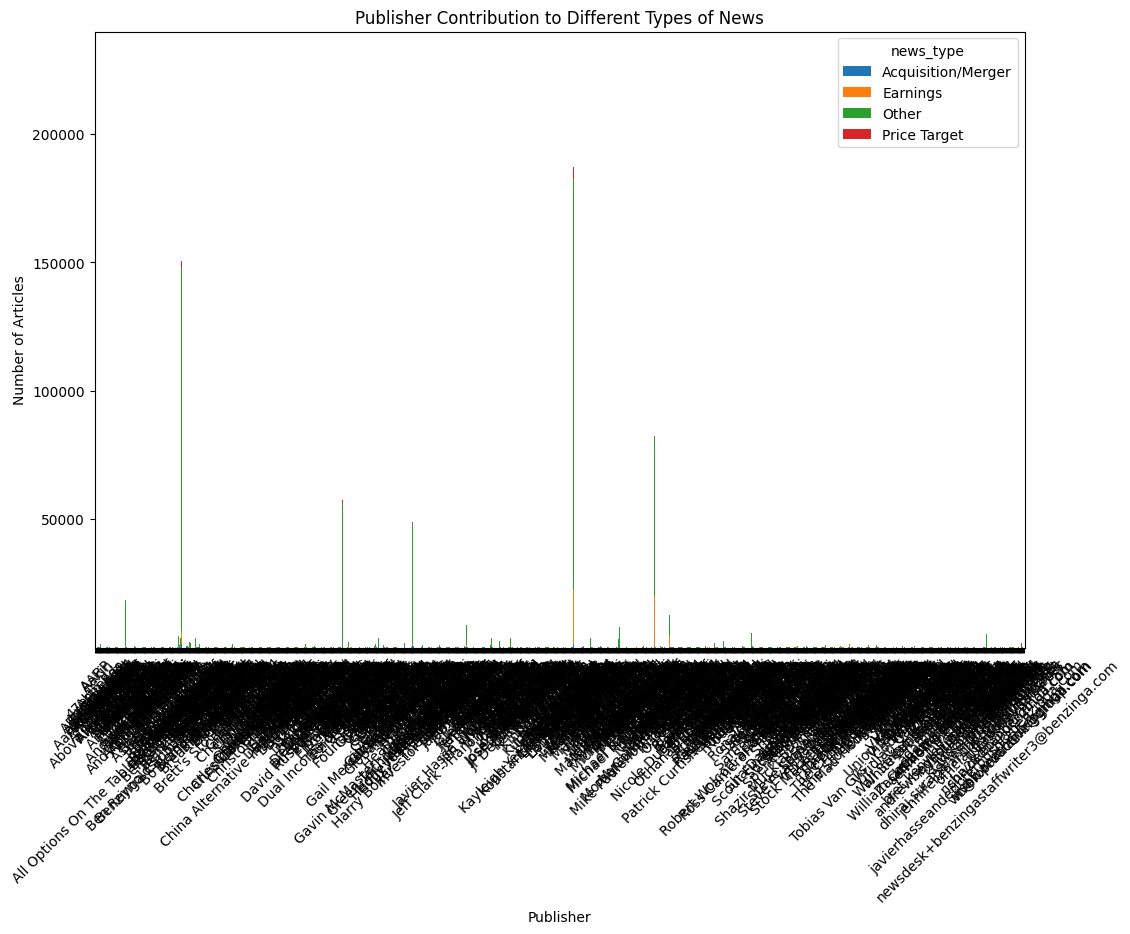


Number of articles mentioning 'earnings' or 'profit': 96748

Number of Articles Mentioning 'Earnings' or 'Profit' by Publisher:
publisher
ABNNewswire           1
Aaron Jackson.Ed      1
Abe Raymond          13
Abhi Rao              5
Adam Parker           1
                   ... 
pconfidential         6
strichie              8
superman              6
tradermark           68
webmaster           554
Length: 336, dtype: int64


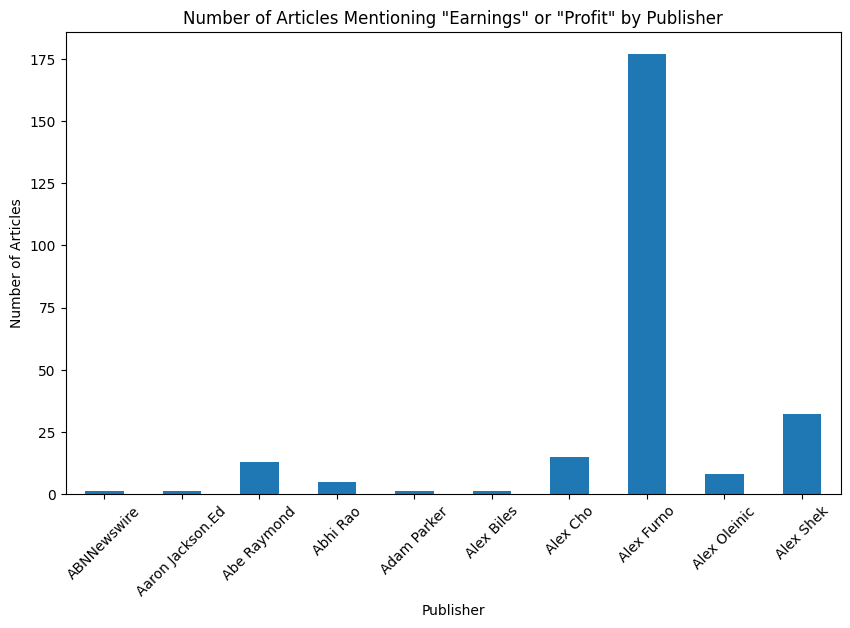

In [8]:
import re
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Extract Domains from Email Addresses using Regex
def extract_domain(email):
    match = re.search(r'@([\w.-]+)', email)
    return match.group(1) if match else email

df['domain'] = df['publisher'].apply(extract_domain)

# Count the frequency of each domain
domain_counts = df['domain'].value_counts()
print("\nTop Domains:")
print(domain_counts.head(10))  # Adjust the number to your need

# Visualize the top domains
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar')
plt.title('Top Contributing Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Analyze the type of news reported by publishers using regular expressions
def categorize_news_type(headline):
    if re.search(r'\bearnings\b', headline, re.IGNORECASE):
        return 'Earnings'
    elif re.search(r'\bprice target\b', headline, re.IGNORECASE):
        return 'Price Target'
    elif re.search(r'\bacquisition\b|\bmerger\b', headline, re.IGNORECASE):
        return 'Acquisition/Merger'
    else:
        return 'Other'

df['news_type'] = df['headline'].apply(categorize_news_type)

# Publisher contribution to different types of news
publisher_news_type = df.groupby(['publisher', 'news_type']).size().unstack().fillna(0)

# Visualize the contribution of each publisher to different types of news
publisher_news_type.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Publisher Contribution to Different Types of News')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Use Regex to Identify Patterns in Headlines
# Example: Find headlines mentioning "earnings" or "profit"
df['mention_earnings'] = df['headline'].apply(lambda x: bool(re.search(r'\b(earnings|profit)\b', x, re.IGNORECASE)))

# Count the number of articles mentioning earnings or profit
earnings_count = df['mention_earnings'].sum()
print(f"\nNumber of articles mentioning 'earnings' or 'profit': {earnings_count}")

#  Analyze the difference in news types by publishers based on regex
# Example: Compare the number of articles mentioning earnings by each publisher
publisher_earnings = df[df['mention_earnings']].groupby('publisher').size()
print("\nNumber of Articles Mentioning 'Earnings' or 'Profit' by Publisher:")
print(publisher_earnings)

# Visualize the comparison
plt.figure(figsize=(10, 6))
publisher_earnings.head(10).plot(kind='bar')
plt.title('Number of Articles Mentioning "Earnings" or "Profit" by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Distribution:
sentiment
Neutral     741200
Positive    441852
Negative    224276
Name: count, dtype: int64


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_1680\3083663834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


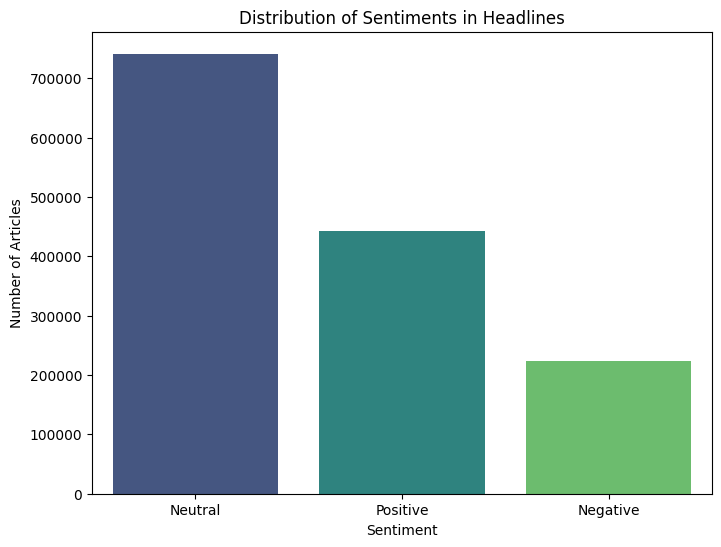

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')
# nltk.download('stopwords')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['headline'].apply(analyze_sentiment_vader)

# Count the number of articles by sentiment
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()



## Topic modelling

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic #1:
stocks pt buy target maintains price raises session 00 moving

Topic #2:
top benzinga says announces stocks upgrades downgrades industry etf energy

Topic #3:
earnings stock scheduled 10 watch stocks analyst alert option may

Topic #4:
shares market update trading higher mid companies lower new stocks

Topic #5:
vs est eps reports sales sees estimate q4 q1 q2



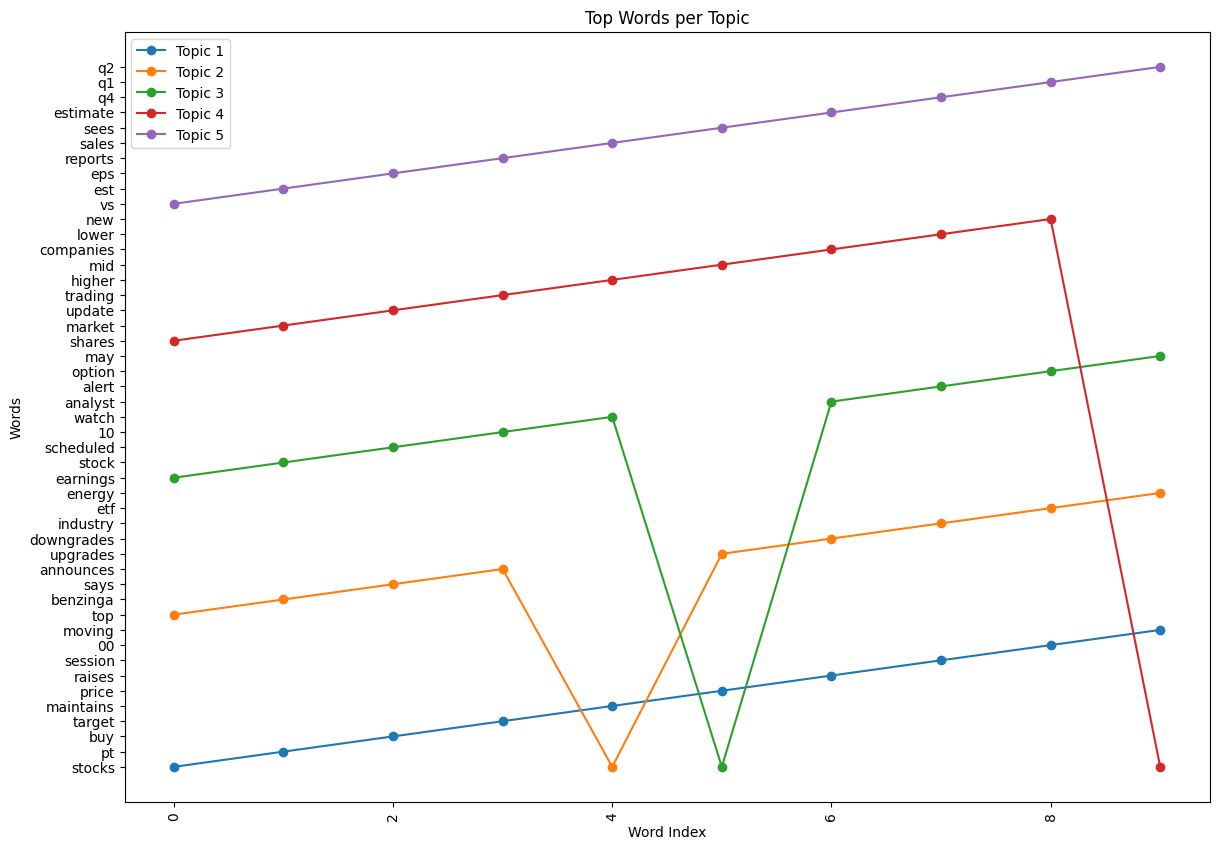

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download stopwords from NLTK
nltk.download('stopwords')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Preprocessing for topic modeling
def preprocess_text(text):
    text = text.lower()
    text = nltk.RegexpTokenizer(r"\w+").tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    return ' '.join(text)

# Apply preprocessing
df['processed_headline'] = df['headline'].apply(preprocess_text)

# Vectorize text data
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 words
X = vectorizer.fit_transform(df['processed_headline'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust number of topics as needed
lda.fit(X)

# Get topic terms
feature_names = vectorizer.get_feature_names_out()
topics = lda.components_

# Display top words per topic
num_words = 10
for topic_idx, topic in enumerate(topics):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
    print()

# Optional: Visualize the topics
import numpy as np

topic_words = []
for topic_idx, topic in enumerate(topics):
    words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    topic_words.append(words)

topic_df = pd.DataFrame(topic_words, columns=[f"Word {i+1}" for i in range(num_words)])
topic_df.index.name = 'Topic'

# Plot the top words for each topic
fig, ax = plt.subplots(figsize=(14, 10))
for i, words in enumerate(topic_words):
    ax.plot(words, label=f"Topic {i+1}", marker='o')

ax.set_title('Top Words per Topic')
ax.set_xlabel('Word Index')
ax.set_ylabel('Words')
ax.legend(loc='best')
plt.xticks(rotation=90)
plt.show()
